In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# plt.style.use(['science', 'ieee'])
plt.style.use(['ieee', 'science'])

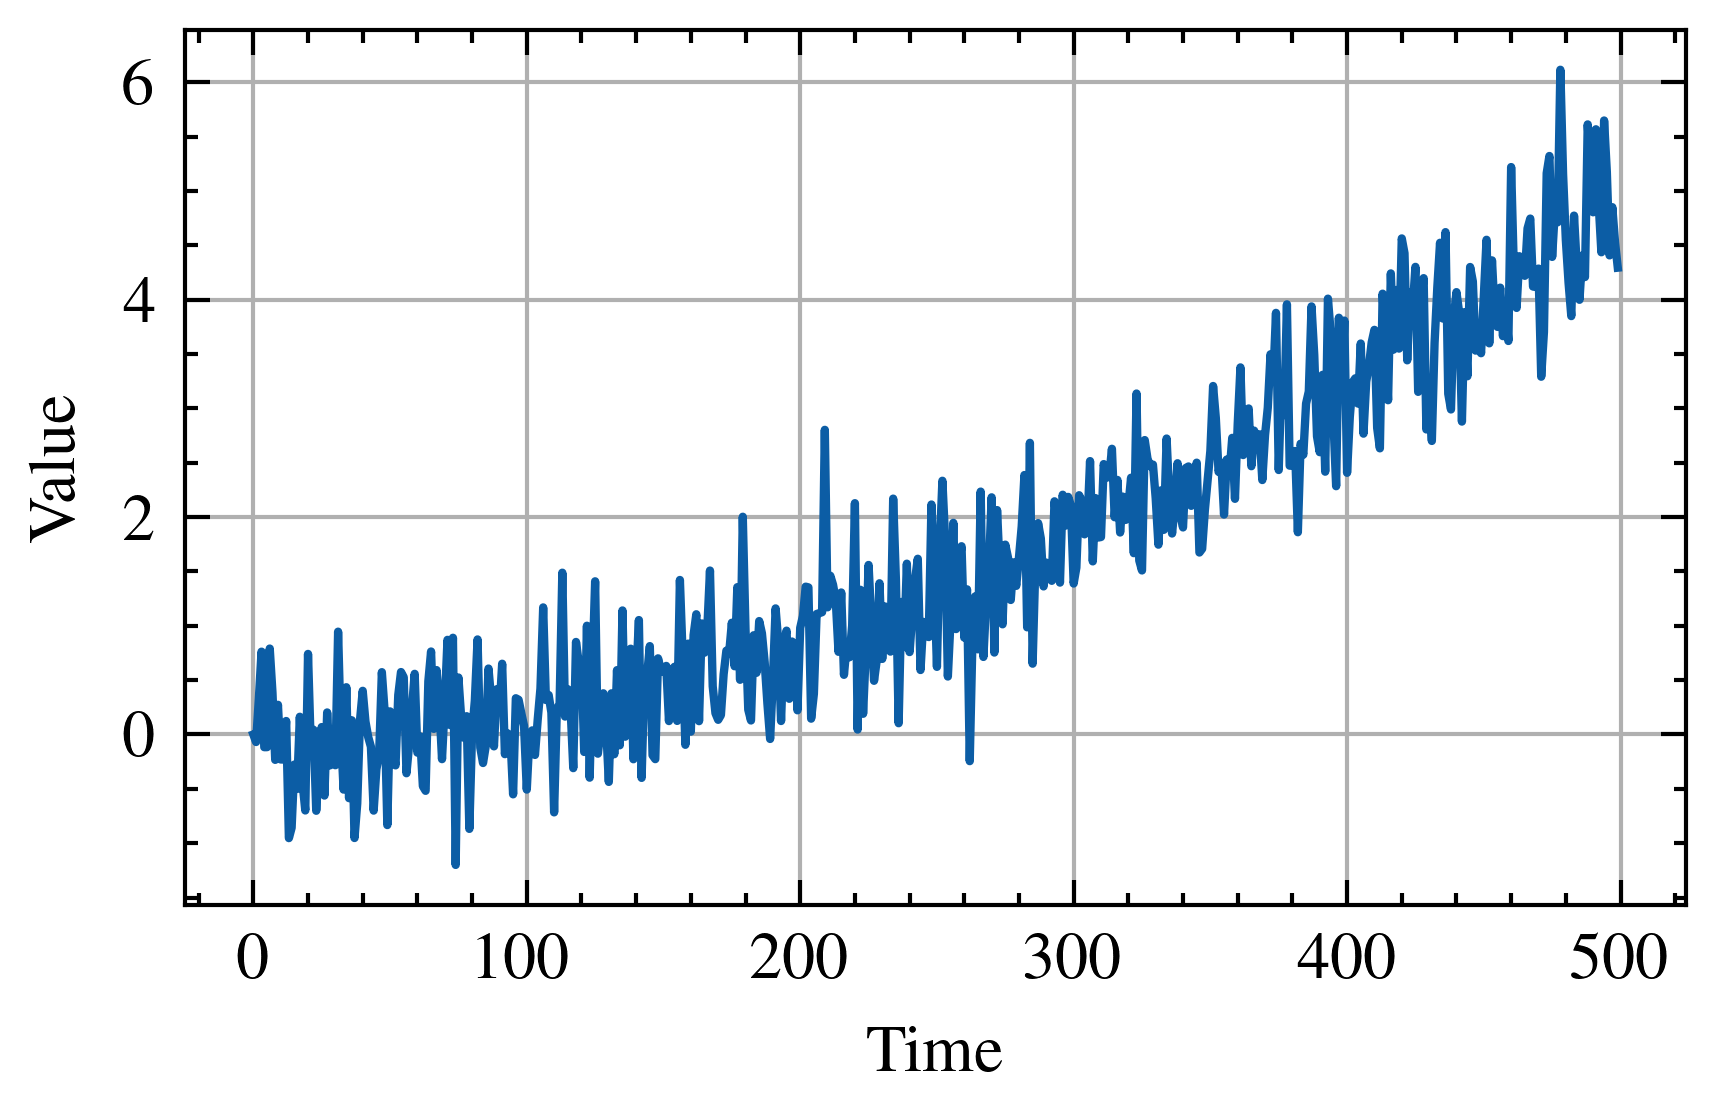

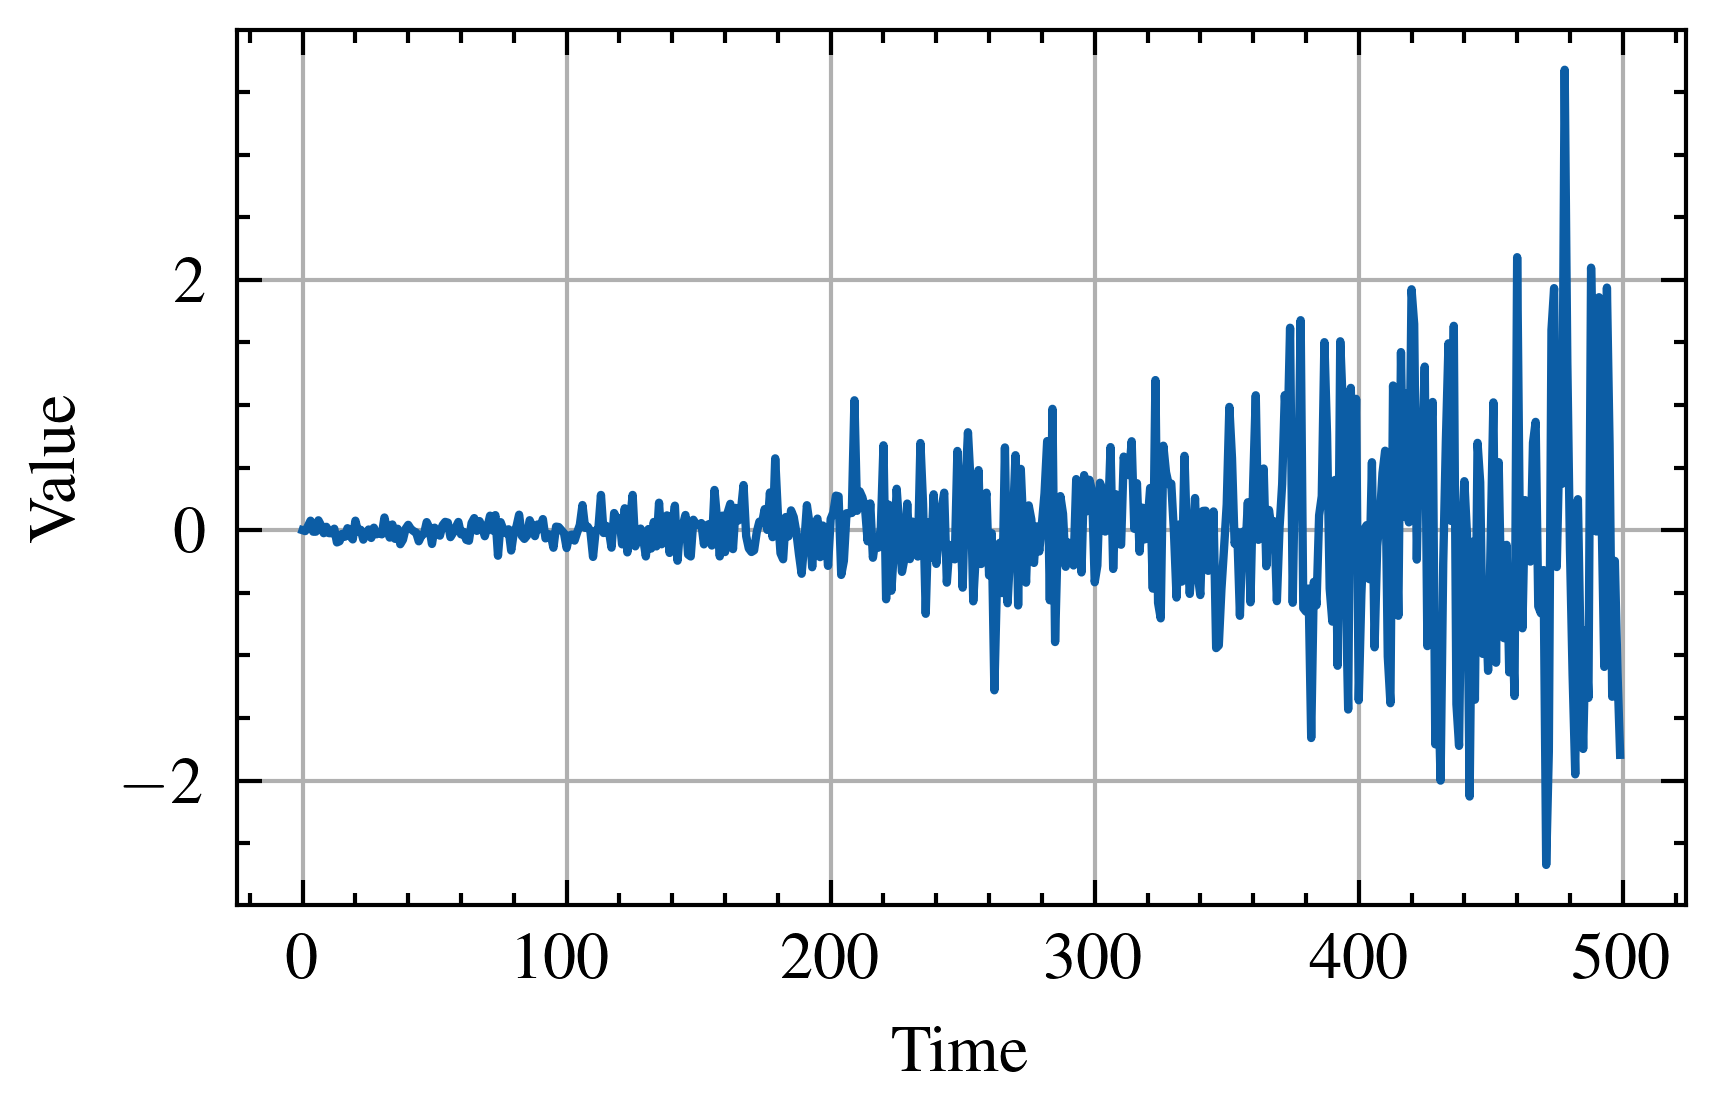

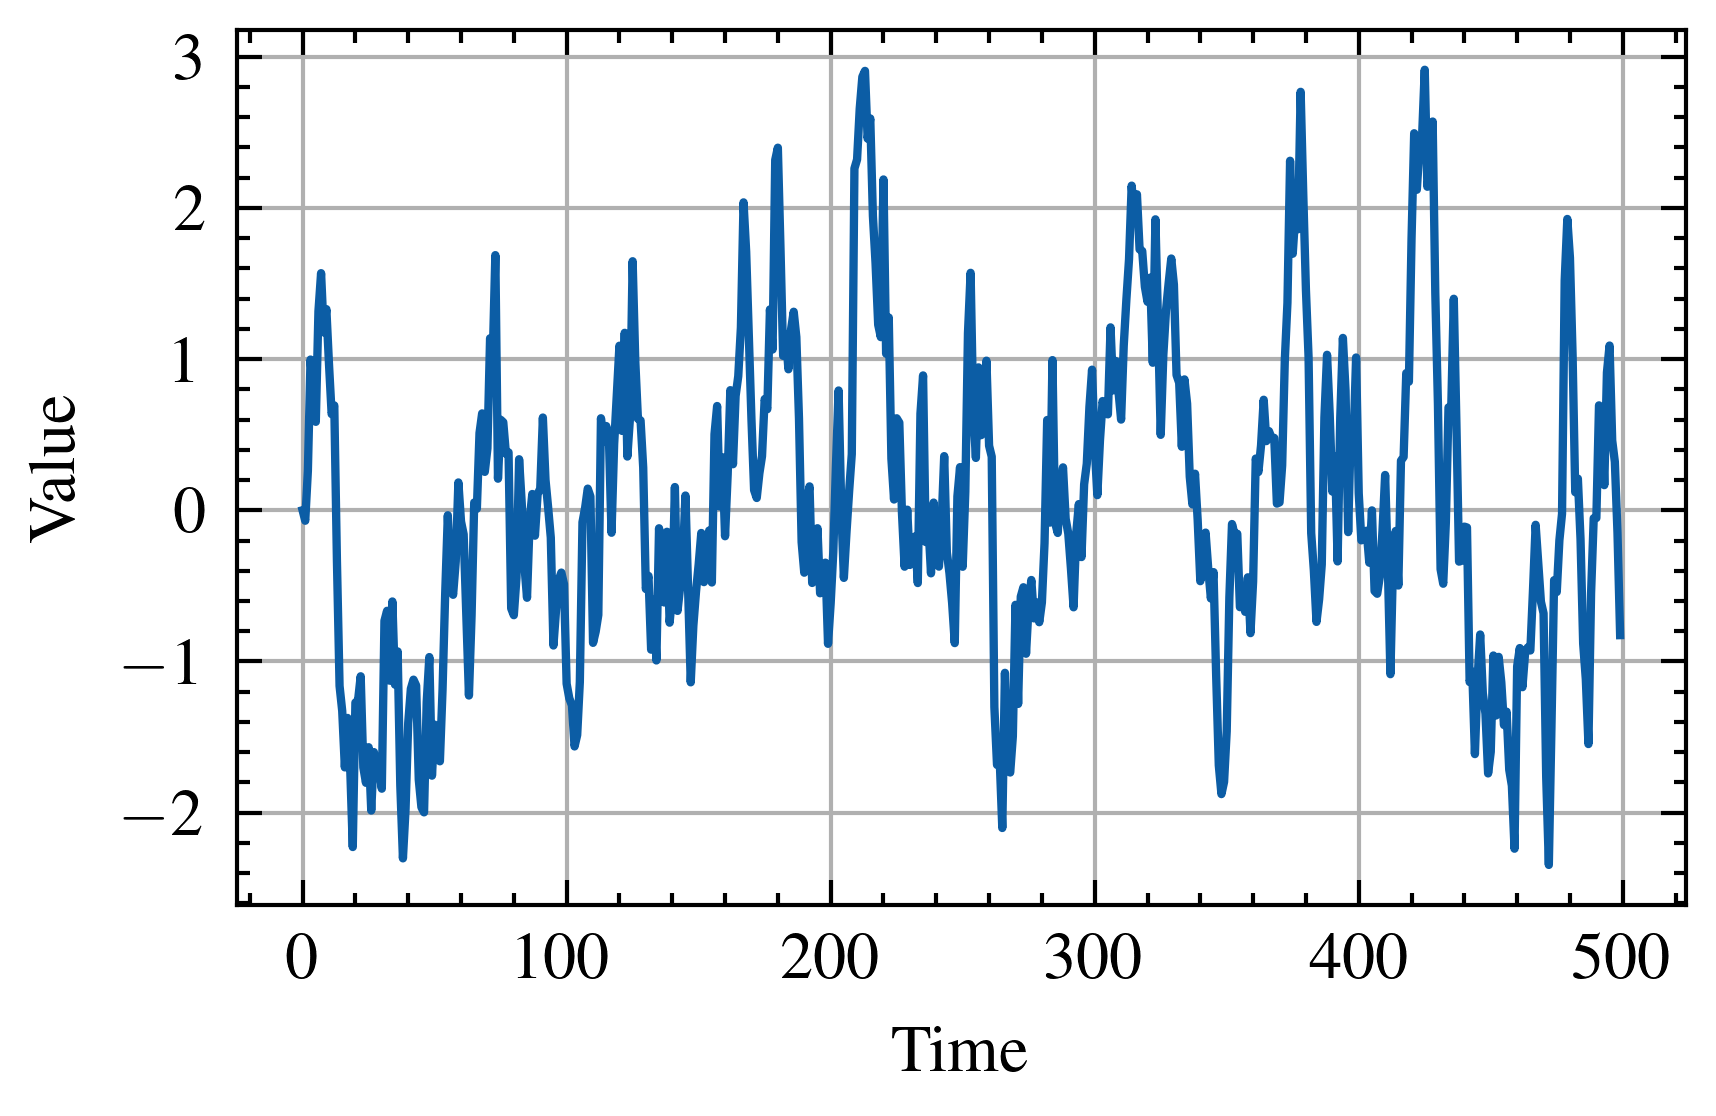

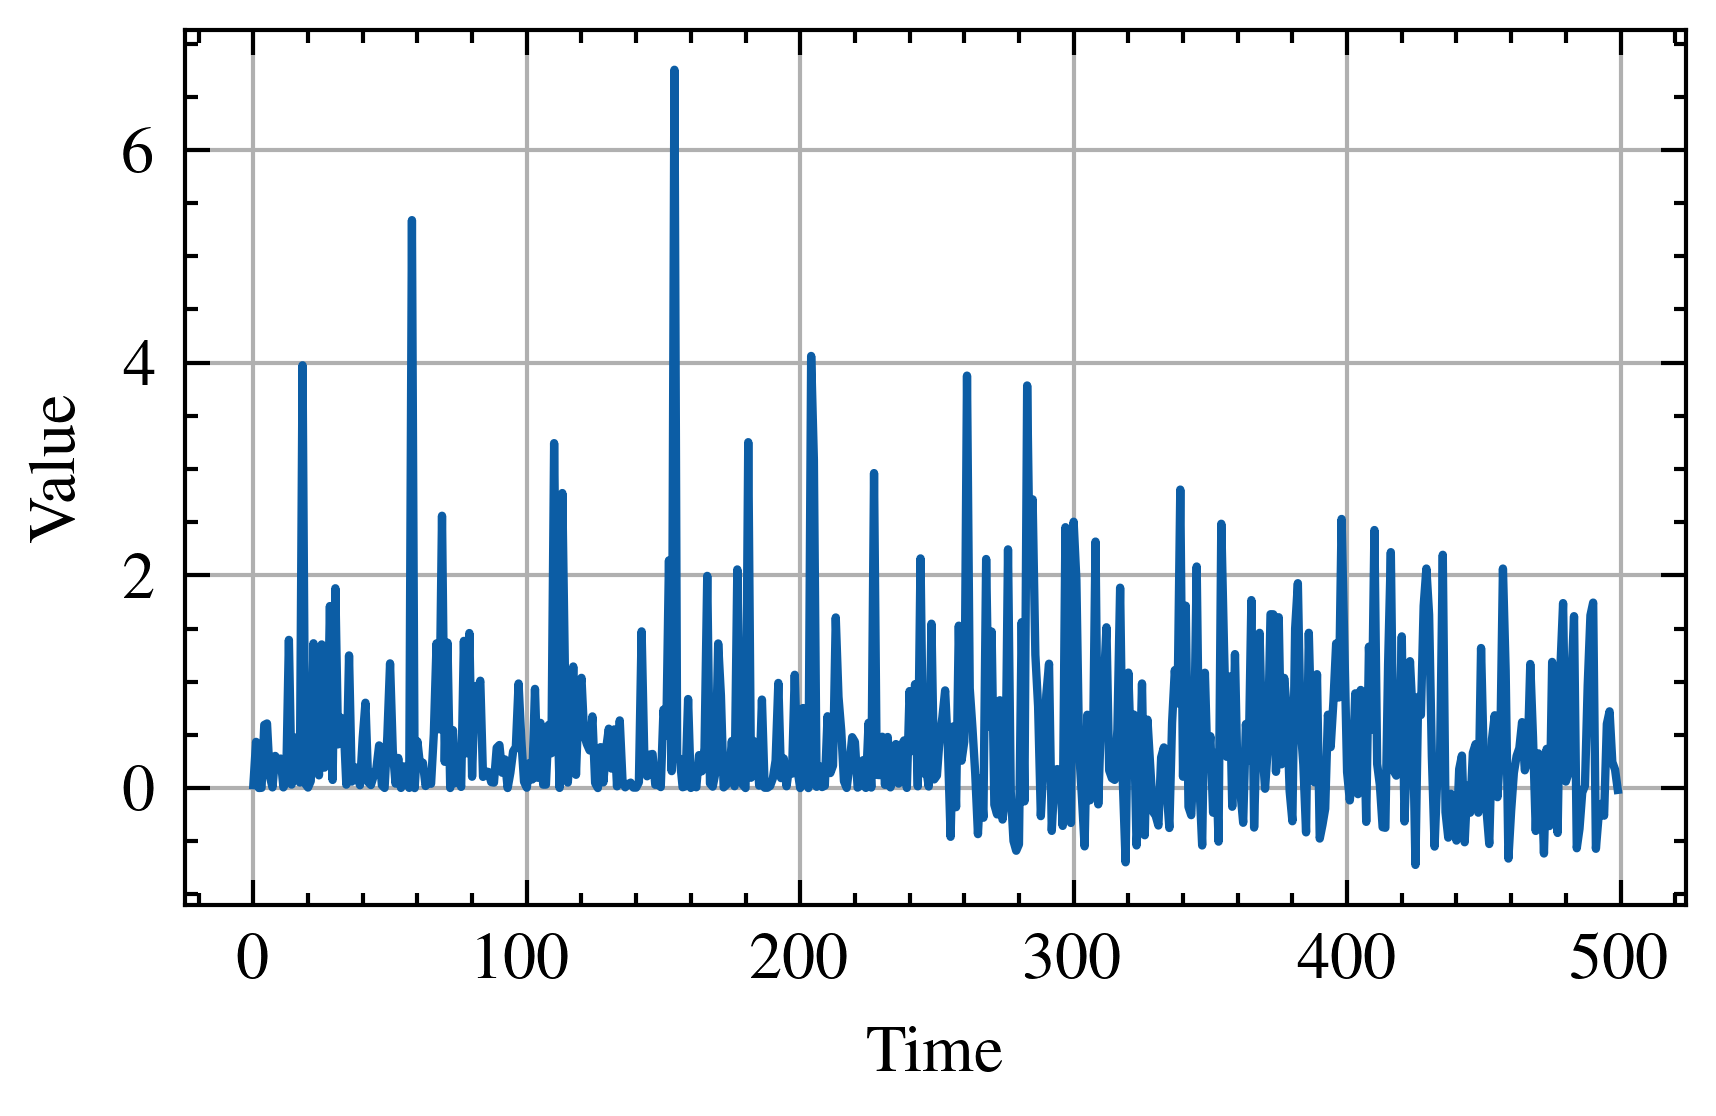

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the plots
n_points = 500

# 2. Non-IID Process: Strong Autocorrelated process (AR(1) with periodicity)
phi = 0.9  # Stronger AR(1) coefficient for autocorrelation
noise = np.random.normal(0, 0.5, n_points)
trend_process = np.zeros(n_points)
autocorrelated_process_strong = np.zeros(n_points)
variance_change_process = np.zeros(n_points)

for t in range(1, n_points):
    autocorrelated_process_strong[t] = (
        phi * autocorrelated_process_strong[t-1] + noise[t]
    )
    trend_process[t] = 2e-5*t**2 + 1e-5*t + noise[t]
    variance_change_process[t] = noise[t] * (0.1 + 1e-5*t**2 + 1e-5*t)

# Manipulate skewness (third moment) and ensure same mean/variance for two parts
data_skew = np.random.normal(0, 1, n_points)

# Split data into two parts
data1 = data_skew[:250]
data2 = data_skew[250:]

# Positive skewness in the first part (rightward tail) using a Gamma distribution with shape < 1
data1 = gamma.rvs(a=0.5, scale=1, size=250)  # Shape parameter < 1 for positive skewness

# Negative skewness in the second part (leftward tail) using a Gamma distribution with shape > 1
data2 = gamma.rvs(a=2, scale=1, size=250)  # Shape parameter > 1 for negative skewness

# Ensuring that both parts have the same mean and variance
mean1, mean2 = np.mean(data1), np.mean(data2)
std1, std2 = np.std(data1), np.std(data2)

# Adjusting the second part to match mean and variance of the first
data2 = (data2 - mean2) / std2 * std1 + mean1

# Combine the parts
combined_data = np.concatenate([data1, data2])

# Plotting the processes

# Plot Long-term Trend Process
figsize = (3, 2)
plt.figure(figsize=figsize)
plt.plot(trend_process, lw=1)
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.savefig("./plots/example11.png", dpi=600)
plt.show()

# Plot Variance Change Process
plt.figure(figsize=figsize)
plt.plot(variance_change_process, lw=1)
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.savefig("./plots/example12.png", dpi=600)
plt.show()

# Plot Stronger Autocorrelated Process
plt.figure(figsize=figsize)
plt.plot(autocorrelated_process_strong, lw=1)
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.savefig("./plots/example13.png", dpi=600)
plt.show()


# Plot Combined Data with manipulated skewness
plt.figure(figsize=figsize)
plt.plot(combined_data, lw=1)
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.savefig("./plots/example14.png", dpi=600)
plt.show()
